In [181]:
import os
import random
from PIL import Image, ImageFilter
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, models, optimizers
from tensorflow.random import set_seed
from sklearn.model_selection import train_test_split

seed_value = 1
os.environ['PYTHONHASHSEED']=str(seed_value)

random.seed(seed_value)
np.random.seed(seed_value)
set_seed(seed_value)


print("tensorflow version is:", tf.__version__)


temp0 = os.listdir('/Users/anu/Desktop/Spring2022/BMED8813/project/BHI_Group3/data/even_slices/0/')
ct0 = ['/Users/anu/Desktop/Spring2022/BMED8813/project/BHI_Group3/data/even_slices/0/' + i for i in temp0]

temp1 = os.listdir('/Users/anu/Desktop/Spring2022/BMED8813/project/BHI_Group3/data/even_slices/1/')
ct1 = ['/Users/anu/Desktop/Spring2022/BMED8813/project/BHI_Group3/data/even_slices/1/' + i for i in temp1]

temp2 = os.listdir('/Users/anu/Desktop/Spring2022/BMED8813/project/BHI_Group3/data/even_slices/2/')
ct2 = ['/Users/anu/Desktop/Spring2022/BMED8813/project/BHI_Group3/data/even_slices/2/' + i for i in temp2]

temp3 = os.listdir('/Users/anu/Desktop/Spring2022/BMED8813/project/BHI_Group3/data/even_slices/3/')
ct3 = ['/Users/anu/Desktop/Spring2022/BMED8813/project/BHI_Group3/data/even_slices/3/' + i for i in temp3]

tensorflow version is: 2.7.0


In [178]:
print("Total class 0 images:", len(ct0))
print("Total class 1 images:", len(ct1))
print("Total class 2 images:", len(ct2))
print("Total class 3 images:", len(ct3))

Total class 0 images: 125
Total class 1 images: 125
Total class 2 images: 125
Total class 3 images: 45


In [192]:
all_files = np.concatenate((ct0, ct1, ct2, ct3),axis=0)
all_labels = [int(all_files[i][-16]) for i in range(len(all_files))]

X = all_files
y = np.asarray(all_labels)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8)

numpy.ndarray

Maximum is 72, minimum is 72, median is 72.0


(array([  0.,   0.,   0.,   0.,   0., 420.,   0.,   0.,   0.,   0.]),
 array([71.5, 71.6, 71.7, 71.8, 71.9, 72. , 72.1, 72.2, 72.3, 72.4, 72.5]),
 <BarContainer object of 10 artists>)

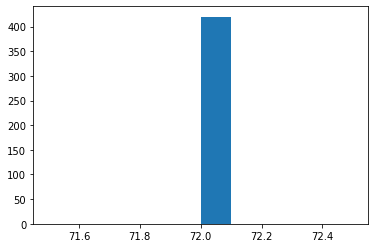

In [193]:
all_slices = [np.shape(np.load(i))[0] for i in all_files]
print(f'Maximum is {np.max(all_slices)}, minimum is {np.min(all_slices)}, median is {np.median(all_slices)}')
plt.hist(all_slices)

In [149]:
# zero pad all the data under max number of slices
im = 0
for i in all_files:
    im = np.load(i)
    if im.shape[0] < np.max(all_slices):
        im = np.pad(im, ((int((np.max(all_slices) - im.shape[0])/2), 
                          int((np.max(all_slices) - im.shape[0])/2)), (0,0), (0,0)))
    if im.shape[0] % 2 == 1:
        im = np.pad(im, ((1,0), (0,0), (0,0)))
    np.save(os.path.join(os.getcwd(), 'data/even_slices', i[-16:]), im)
        
# t = np.load('/Users/anu/Desktop/Spring2022/BMED8813/project/BHI_Group3/data/even_slices/study_0003.npy')


In [88]:
model = models.Sequential() 

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(31, 512, 512)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten()) 

model.add(layers.Dense(168, activation='relu'))
model.add(layers.Dense(4)) # final Dense layer has 4 neurons representing the 4 classes

### fill in more layers here ###

print(model.summary())

model.compile(optimizer='Adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=20, #batch_size=32,
                    validation_data=(X_test, y_test))

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 29, 510, 32)       147488    
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 14, 255, 32)      0         
 g2D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 114240)            0         
                                                                 
 dense_16 (Dense)            (None, 168)               19192488  
                                                                 
 dense_17 (Dense)            (None, 4)                 676       
                                                                 
Total params: 19,340,652
Trainable params: 19,340,652
Non-trainable params: 0
_________________________________________

ValueError: in user code:

    File "/Users/anu/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 878, in train_function  *
        return step_function(self, iterator)
    File "/Users/anu/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 867, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/anu/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 860, in run_step  **
        outputs = model.train_step(data)
    File "/Users/anu/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 808, in train_step
        y_pred = self(x, training=True)
    File "/Users/anu/opt/anaconda3/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/anu/opt/anaconda3/lib/python3.8/site-packages/keras/engine/input_spec.py", line 227, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" '

    ValueError: Exception encountered when calling layer "sequential_10" (type Sequential).
    
    Input 0 of layer "conv2d_13" is incompatible with the layer: expected min_ndim=4, found ndim=1. Full shape received: (None,)
    
    Call arguments received:
      • inputs=tf.Tensor(shape=(None,), dtype=string)
      • training=True
      • mask=None
